In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd


In [2]:
df = pd.read_csv("diabetes_engineered_normalized_balanced_allNumerical.csv")

df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,gender_Female,...,Female_Child,Female_Adult,Female_Old,Other_Child,Other_Adult,Other_Old,age_squared,bmi_category,HbA1c_above_6_5,blood_glucose_above_126
0,1.389214,0,1,2,0.326336,0.155970,1.510204,1,2,0,...,0,0,0,0,0,0,5329.0,2,0,1
1,0.810480,0,0,0,-1.390648,2.485395,-0.298664,1,0,1,...,0,1,0,0,0,0,3600.0,3,1,1
2,1.611804,0,0,3,1.846798,1.180917,0.410216,1,2,1,...,0,0,1,0,0,0,6084.0,1,1,1
3,0.676926,0,0,3,0.098784,0.528678,0.043554,1,0,0,...,0,0,0,0,0,0,3249.0,2,0,1
4,1.077588,0,0,3,-0.012037,1.833156,0.532437,1,2,1,...,0,0,1,0,0,0,4356.0,2,1,1


In [3]:
diabetes_counts = df['diabetes'].value_counts()

# Calculate the percentage for each class
diabetes_percentage = (diabetes_counts / len(df)) * 100

# Display the result
print("Diabetes distribution (in percentage):")
print(diabetes_percentage)

Diabetes distribution (in percentage):
diabetes
0    87.001019
1    12.998981
Name: count, dtype: float64


In [4]:
# Features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [5]:
from sklearn.model_selection import train_test_split

# First split into training (70%) and remaining (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Then split the remaining data into test (20%) and validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

# Verify the distribution in each split
print("Training set distribution:\n", y_train.value_counts(normalize=True) * 100)
print("Test set distribution:\n", y_test.value_counts(normalize=True) * 100)
print("Validation set distribution:\n", y_val.value_counts(normalize=True) * 100)


Training set distribution:
 diabetes
0    87.000386
1    12.999614
Name: proportion, dtype: float64
Test set distribution:
 diabetes
0    86.998128
1    13.001872
Name: proportion, dtype: float64
Validation set distribution:
 diabetes
0    87.00468
1    12.99532
Name: proportion, dtype: float64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Evaluate the model on the validation set
print("\nValidation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))


Test Set Evaluation:
Accuracy: 0.9468483461618473
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8364
           1       0.85      0.72      0.78      1250

    accuracy                           0.95      9614
   macro avg       0.90      0.85      0.87      9614
weighted avg       0.94      0.95      0.94      9614

Confusion Matrix:
 [[8205  159]
 [ 352  898]]

Validation Set Evaluation:
Accuracy: 0.9392615704628186
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     16731
           1       0.83      0.66      0.74      2499

    accuracy                           0.94     19230
   macro avg       0.89      0.82      0.85     19230
weighted avg       0.94      0.94      0.94     19230

Confusion Matrix:
 [[16402   329]
 [  839  1660]]


C:\Users\Aleix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

accuracy, precision, recall, f1, roc_auc

(0.9468483461618473,
 0.8495742667928098,
 0.7184,
 0.7785002167316861,
 0.9631901004304162)

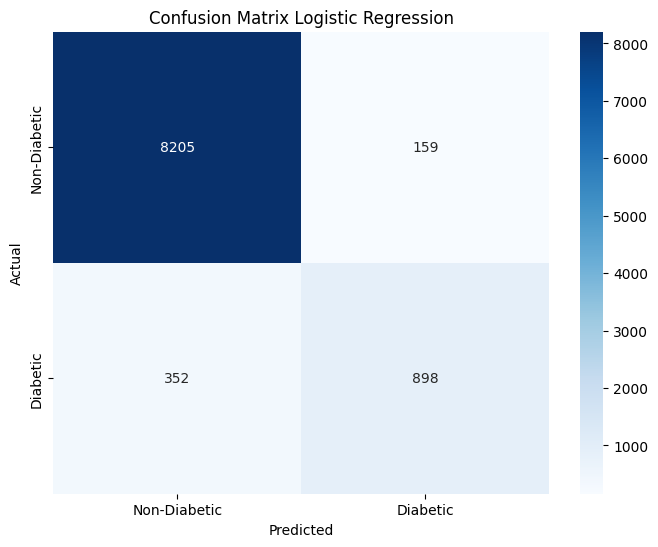

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and your test data is X_test, y_test
y_pred_test = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
import pickle

# Save the model to a .pkl file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)